I. import lib

In [1]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from delete_stopwords import delete_stopwords
from dataprep import load_datasets

II. load data

In [2]:
train_df,test_df,val_df = load_datasets()
df=pd.concat([train_df,val_df])
label_mapping = {'sadness':0, 'joy':1, 'love':2, 'anger':3, 'fear':4,'surprise':5}
# Rename the 'Label' column using the mapping dictionary
df['label'] = df['label'].map(label_mapping)
test_df['label'] = test_df['label'].map(label_mapping)
print(df.head())
print(test_df.head())
#save data for train PhoBERT
df.to_csv('training.csv')
test_df.to_csv('testing.csv')

                                                text  label
0                      tôi không cảm thấy bị sỉ nhục      0
1  tôi có thể đi từ cảm giác vô vọng đến vô cùng ...      0
2  tôi đang tranh thủ một phút để đăng bài, tôi c...      3
3  tôi luôn cảm thấy hoài niệm về lò sưởi tôi sẽ ...      2
4                         tôi đang cảm thấy cáu kỉnh      3
                                                text  label
0  tôi đang cảm thấy khá chán nản nên hiện tại tô...      0
1  tôi đang cập nhật blog của mình vì tôi cảm thấ...      0
2  tôi không bao giờ để cô ấy tách khỏi tôi bởi v...      0
3  tôi rời đi với bó hoa tulip đỏ và vàng dưới cá...      1
4        tôi đã cảm thấy hơi vô ích khi làm điều này      0


III. Preprocessing

- delete special charater, ...

In [3]:
import re
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
df['text'] = df['text'].str.replace(r'http\S+', '', regex=True)
test_df['text'] = test_df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
test_df['text'] = test_df['text'].str.replace(r'\d+', '', regex=True)
test_df['text'] = test_df['text'].str.replace(r'\s+', ' ', regex=True)
test_df['text'] = test_df['text'].str.replace(r'[^\w\s]', '', regex=True)
test_df['text'] = test_df['text'].str.replace(r'http\S+', '', regex=True)
print(df.head())
print(test_df.head())

                                                text  label
0                      tôi không cảm thấy bị sỉ nhục      0
1  tôi có thể đi từ cảm giác vô vọng đến vô cùng ...      0
2  tôi đang tranh thủ một phút để đăng bài tôi cả...      3
3  tôi luôn cảm thấy hoài niệm về lò sưởi tôi sẽ ...      2
4                         tôi đang cảm thấy cáu kỉnh      3
                                                text  label
0  tôi đang cảm thấy khá chán nản nên hiện tại tô...      0
1  tôi đang cập nhật blog của mình vì tôi cảm thấ...      0
2  tôi không bao giờ để cô ấy tách khỏi tôi bởi v...      0
3  tôi rời đi với bó hoa tulip đỏ và vàng dưới cá...      1
4        tôi đã cảm thấy hơi vô ích khi làm điều này      0


- delete stopword

In [4]:
stopwords_file = 'C:/Users/thanh/Documents/NLP20241PRJ-1/src/vietnamese_stopwords.txt'
df = delete_stopwords(df, stopwords_file)  
test_df =delete_stopwords(test_df,stopwords_file)
print(df.head())
print(test_df.head())

                                                text  label
0                                            sỉ nhục      0
1  thể đi từ giác vô vọng đến vô cùng hy vọng chỉ...      0
2   đang tranh thủ một phút để đăng bài thật sai lầm      3
3  luôn hoài niệm về lò sưởi sẽ biết rằng nó vẫn ...      2
4                                      đang cáu kỉnh      3
                                                text  label
0  đang khá chán nản nên hiện tại nhiều tham vọng...      0
1                     đang cập nhật blog thật tồi tệ      0
2  bao giờ để cô tách khỏi bởi bao giờ muốn cô th...      0
3  rời đi với bó hoa tulip đỏ vàng cánh tay lạc q...      1
4                     đã hơi vô ích khi làm điều này      0


In [5]:
# df.to_csv('training.csv')
# test_df.to_csv('testing.csv')

IV. Model
1. Logistic regression

[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   0.3s
[Pipeline] .......... (step 2 of 2) Processing logistic, total=   1.3s
Accuracy:  0.722
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       581
           1       0.73      0.87      0.79       695
           2       0.62      0.38      0.47       159
           3       0.73      0.63      0.67       275
           4       0.71      0.61      0.65       224
           5       0.70      0.47      0.56        66

    accuracy                           0.72      2000
   macro avg       0.70      0.62      0.65      2000
weighted avg       0.72      0.72      0.71      2000



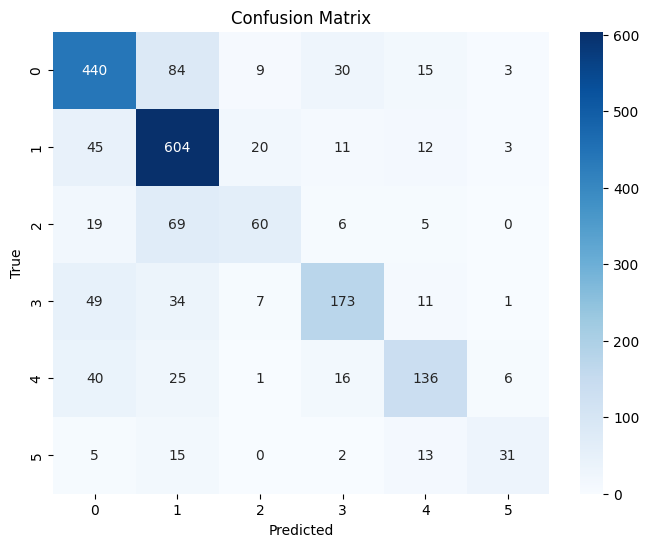

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

train_data = df
test_data = test_df

logistic_r = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logistic', LogisticRegression(max_iter=1000))
], verbose=True)
logistic_r.fit(train_data['text'], train_data['label'])
predictions = logistic_r.predict(test_data['text'])

accuracy = accuracy_score(test_data['label'], predictions)
print("Accuracy: ", accuracy)
print(classification_report(test_data['label'], predictions))
cm = confusion_matrix(test_data['label'], predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logistic_r.classes_, yticklabels=logistic_r.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


2. BiLSTM

- create vocab


In [7]:
from itertools import chain
from collections import Counter
import torch
from tqdm import tqdm
from underthesea import word_tokenize

class Vocabulary:
    def __init__(self):
        self.word2id = dict()
        self.word2id['<pad>'] = 0
        self.word2id['<unk>'] = 1
        self.unk_id = self.word2id['<unk>']
        self.id2word = {v: k for k, v in self.word2id.items()}

    def __getitem__(self, word):
        return self.word2id.get(word, self.unk_id)

    def __contains__(self, word):
        return word in self.word2id

    def __len__(self):
        return len(self.word2id)

    def id2word(self, word_index):
        return self.id2word[word_index]

    def add(self, word):
        if word not in self:
            word_index = self.word2id[word] = len(self.word2id)
            self.id2word[word_index] = word
            return word_index
        else:
            return self[word]

    @staticmethod
    def tokenize_corpus(corpus):
        """Split the documents of the corpus into words
        @param corpus (list(str)): list of documents
        @return tokenized_corpus (list(list(str))): list of words
        """
        print("Tokenize the corpus...")
        tokenized_corpus = []
        for document in tqdm(corpus):
            # Ensure document is a string and normalized
            document = str(document)
            tokenized_document = [word.replace(" ", "_") for word in word_tokenize(document)]
            tokenized_corpus.append(tokenized_document)

        return tokenized_corpus

    def corpus_to_tensor(self, corpus, is_tokenized=False):
        if is_tokenized:
            tokenized_corpus = corpus
        else:
            tokenized_corpus = self.tokenize_corpus(corpus)
        indices_corpus = []
        for document in tqdm(tokenized_corpus):
            indices_document = torch.tensor([self[word] for word in document], dtype=torch.int64)
            indices_corpus.append(indices_document)
        return indices_corpus

    def tensor_to_corpus(self, tensor):
        corpus = []
        for indices in tqdm(tensor):
            document = [self.id2word[index.item()] for index in indices]
            corpus.append(document)
        return corpus

    def add_words_from_corpus(self, corpus, is_tokenized=False):
        print("Adding words from the corpus...")
        if is_tokenized:
            tokenized_corpus = corpus
        else:
            tokenized_corpus = self.tokenize_corpus(corpus)
        word_freq = Counter(chain(*tokenized_corpus))
        non_singletons = [w for w in word_freq if word_freq[w] > 1]
        print(f"Number of words in the corpus: {len(word_freq)}")
        print(f"Number of words with frequency > 1: {len(non_singletons)}")
        for word in non_singletons:
            self.add(word)


No module named 'fasttext'


- create MessageDataset

In [8]:

import torch
from torch.utils.data import Dataset

class MessageDataset(Dataset):
    def __init__(self, vocab, df, tokenized_fpath=None):
        self.vocab = vocab
        self.pad_idx = vocab["<pad>"]
        self.text_list = list(df['text'])
        self.label_list = list(df['label'])
        
        # Build label mapping
        label_type = list(set(self.label_list))
        label_type.sort()
        self.label2id = {label: i for i, label in enumerate(label_type)}

        if tokenized_fpath:
            self.tokenized_text = torch.load(tokenized_fpath)
        else:
            self.tokenized_text = self.vocab.tokenize_corpus(self.text_list)

        self.tensor_data = self.vocab.corpus_to_tensor(self.tokenized_text, is_tokenized=True)
        self.tensor_label = torch.tensor([self.label2id[label] for label in self.label_list], dtype=torch.long)

    def __len__(self):
        return len(self.tensor_data)

    def __getitem__(self, idx):
        return self.tensor_data[idx], self.tensor_label[idx]

    def collate_fn(self, examples):
        examples = sorted(examples, key=lambda e: len(e[0]), reverse=True)

        texts = [e[0] for e in examples]
        texts = torch.nn.utils.rnn.pad_sequence(texts, batch_first=False, padding_value=self.pad_idx)
        text_lengths = torch.tensor([len(e[0]) for e in examples])
        labels = torch.tensor([e[1] for e in examples])

        return {"text": (texts, text_lengths), "label": labels}


- Load vocab

In [9]:
vocab = Vocabulary()
vocab.add_words_from_corpus(list(df['text']) + list(test_df['text']))
train_dataset = MessageDataset(vocab, df)
test_dataset = MessageDataset(vocab, test_df)
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, collate_fn=train_dataset.collate_fn, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, collate_fn=test_dataset.collate_fn, shuffle=False)
for batch in train_loader:
    text, label= batch['text'], batch['label']
    print(f'Texts shape: {text[0].shape}, Labels shape: {label.shape}')
    break 

Adding words from the corpus...
Tokenize the corpus...


100%|██████████| 20000/20000 [00:16<00:00, 1214.49it/s]


Number of words in the corpus: 13239
Number of words with frequency > 1: 6128
Tokenize the corpus...


100%|██████████| 18000/18000 [00:00<00:00, 120219.86it/s]


Tokenize the corpus...


100%|██████████| 2000/2000 [00:00<00:00, 181567.67it/s]

Texts shape: torch.Size([37, 32]), Labels shape: torch.Size([32])


- Training model

In [10]:
import torch.optim as optim
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from collections import defaultdict

class BiLSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, pad_idx):
        super(BiLSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.bilstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=2, bidirectional=True, dropout=0.5)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(0.5)

    def forward(self, text, text_lengths):
        embedded = self.dropout(self.embedding(text))
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu())
        packed_output, (hidden, cell) = self.bilstm(packed_embedded)
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        return self.fc(hidden)

def calculate_accuracy(preds, labels):
    preds = preds.argmax(dim=1, keepdim=True)
    correct = preds.eq(labels.view_as(preds)).sum().item()
    return correct / labels.shape[0]
def train(model, iterator, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    
    for batch in iterator:
        text, text_lengths = batch["text"]
        label = batch["label"]
        text, text_lengths, label = text.to(device), text_lengths.to(device), label.to(device)

        optimizer.zero_grad()
        predictions = model(text, text_lengths).squeeze(1)
        loss = criterion(predictions, label)
        acc = calculate_accuracy(predictions, label)
        
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc

    return epoch_loss / len(iterator), epoch_acc / len(iterator)
def evaluate(model, iterator, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()

    with torch.no_grad():
        for batch in iterator:
            text, text_lengths = batch["text"]
            label = batch["label"]
            text, text_lengths, label = text.to(device), text_lengths.to(device), label.to(device)

            predictions = model(text, text_lengths).squeeze(1)
            loss = criterion(predictions, label)
            acc = calculate_accuracy(predictions, label)

            epoch_loss += loss.item()
            epoch_acc += acc

    return epoch_loss / len(iterator), epoch_acc / len(iterator)
OUTPUT_DIM = 6
INPUT_DIM = len(vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
PAD_IDX = vocab["<pad>"]

model = BiLSTMModel(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, PAD_IDX)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)
def plot_graph(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train')
    plt.plot(val_accuracies, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

N_EPOCHS = 15
best_valid_loss = float('inf')

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, test_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(valid_loss)
    val_accuracies.append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best_model.pt')

    print(f'Epoch {epoch+1}/{N_EPOCHS}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {valid_loss:.4f}, Val Acc: {valid_acc:.4f}')

plot_graph(train_losses, val_losses, train_accuracies, val_accuracies)


KeyboardInterrupt: 

- Evaluation Model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, f1_score
import torch

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def calculate_accuracy(predictions, labels):
    max_preds = predictions.argmax(dim=1, keepdim=True)  # get the index of the max probability
    correct = max_preds.squeeze(1).eq(labels)
    return correct.sum() / torch.FloatTensor([labels.shape[0]])

def evaluate(model, iterator, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    all_predictions = []
    all_labels = []
    model.eval()

    with torch.no_grad():
        for batch in iterator:
            text, text_lengths = batch["text"]
            label = batch["label"]
            text, text_lengths, label = text.to(device), text_lengths.to(device), label.to(device)

            predictions = model(text, text_lengths).squeeze(1)
            loss = criterion(predictions, label)
            acc = calculate_accuracy(predictions, label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

            # Convert predictions and labels to numpy arrays
            preds_np = predictions.argmax(dim=1).detach().cpu().numpy()
            labels_np = label.detach().cpu().numpy()

            all_predictions.extend(preds_np)
            all_labels.extend(labels_np)

    # Calculate confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    # Calculate F1 score
    f1 = f1_score(all_labels, all_predictions, average='weighted')

    return epoch_loss / len(iterator), epoch_acc / len(iterator), cm, f1

# Evaluate model and plot confusion matrix
test_loss, test_acc, cm, f1 = evaluate(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | F1 Score: {f1:.3f}')

# Define class names (if available)
class_names = [str(i) for i in range(OUTPUT_DIM)]  # Replace with actual class names if available

# Plot confusion matrix
plot_confusion_matrix(cm, classes=class_names)
plt.show()


3. PhoBERT
We train PhoBERT at : https://www.kaggle.com/code/quocnv/notebookff4ee20e39